In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
import os
import instructions

In [ ]:
path = os.path.split(os.getcwd())
data_directory = os.path.join(path[0], 'data\\raw')
#data_directory = os.path.join(os.getcwd(), 'data\\raw')


X = instructions.load_csv(data_directory, 'train_data')
y = instructions.load_csv(data_directory, 'train_labels')

In [61]:
y = instructions.load_csv(data_directory, 'train_labels')

In [66]:
from sklearn.preprocessing import binarize
import numpy as np

y_binar = binarize(y)
y = pd.DataFrame(np.ravel(y_binar))

In [53]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,338.539,-98.216,-37488.883,-2346.403,-291.325,553.155,1041.511,391.664,1016.730,49.772,...,350.501,-607.873,430.407,-469.737,68.670,328.636,105.448,-368.834,378.017,-253.044
3746,105.511,-167.468,54447.468,-38055.924,-12394.035,711.218,100.459,-1377.005,-171.175,-325.444,...,4.759,-9.079,104.333,4.676,-1069.879,-92.252,86.110,-4.935,433.674,-355.118
3747,93.186,-155.288,-16555.534,-10605.421,-3027.792,-80.498,-2201.598,-49.392,-848.946,-252.714,...,-342.855,-151.956,7.386,564.910,613.541,-570.735,-5.810,797.659,-289.170,-2025.470
3748,857.066,98.182,-39429.721,26215.357,-1465.352,-340.496,-992.109,990.646,140.943,-281.100,...,200.827,-1445.572,-39.879,421.075,-191.389,-538.616,141.365,552.974,310.130,207.084


In [54]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = std.fit_transform(X)

In [56]:
import handling_outliers as ho

X_rem = ho.removing_iqr(pd.DataFrame(X_std))

In [58]:
X_masked = ho.mask_outliers(pd.DataFrame(X_std), X_rem)

In [59]:
X_replaced = ho.replace_missing_values(pd.DataFrame(X_masked), 5)

In [60]:
X_replaced

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.956603,-2.090995,-0.779319,-1.705003,-0.679182,-1.152735,-0.520916,0.328344,-0.407837,-2.204406,...,0.302007,-0.046534,-1.034740,0.476194,-0.595632,-2.131212,0.161407,0.975154,-0.299314,1.715553
1,0.081790,0.380063,-0.007431,-0.086273,1.757154,-0.864456,1.214323,0.293748,1.502145,0.643388,...,-0.707085,-0.820444,-2.130636,0.163723,-0.142053,-0.421798,-0.529819,-1.465157,0.426158,-1.340783
2,0.844093,-0.989109,0.092602,-0.173940,-1.606071,-1.482817,-0.591553,-0.570965,-1.099315,-0.744593,...,1.142062,-0.728438,0.453446,1.796409,-0.166745,-0.263702,-0.719131,-1.979327,1.082855,1.278390
3,0.487054,0.279889,1.110703,0.506412,-0.625261,1.221940,-0.314777,-0.955742,-1.326159,-0.196054,...,-1.574800,0.695451,1.096150,0.211454,2.165549,0.227377,0.106670,-0.987100,0.916110,1.843469
4,0.196247,0.802160,-1.140956,0.029840,1.202957,-0.608846,-0.238682,-0.083731,-0.327290,-0.241897,...,-0.430029,-0.817988,0.055310,-0.703622,0.500416,0.023897,1.259157,-0.293257,-0.335370,1.087226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,1.076050,-0.503415,-0.862558,-0.055282,-0.004800,0.741343,1.132077,0.428989,1.880958,0.147017,...,1.250072,-1.153307,1.537867,-0.966474,0.066785,0.503467,0.468240,-0.462599,0.605455,-0.378908
3746,0.261649,-0.828331,1.243216,-0.680494,-0.556439,0.963510,0.084122,-1.607334,-0.349195,-1.438059,...,-0.034319,-0.055959,0.308261,-0.023961,-1.323867,-0.138543,0.373772,-0.003662,0.693934,-0.511764
3747,0.218575,-0.771185,-0.383086,-0.199883,-0.129528,-0.149292,-2.479446,-0.078812,-1.621631,-1.130816,...,-1.325665,-0.317795,-0.057320,1.089051,0.732304,-0.868406,-0.075266,1.008543,-0.455180,-0.430542
3748,-1.221132,0.418043,-0.907012,0.444785,-0.058312,-0.514735,-1.132560,1.118615,0.236770,-1.250731,...,0.694050,-2.688472,-0.235554,0.803295,-0.250858,-0.819413,0.643698,0.699954,0.497534,0.219981


In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_prep_pca = pca.fit_transform(X_replaced)

In [71]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(pd.DataFrame(X))

In [81]:
X_pca

array([[ -91593.4338999 ,   96789.87057813],
       [ 184154.26414774,    4749.55327685],
       [ 263109.39098523,   10679.88556538],
       ...,
       [ 179459.09109085,   11374.5612127 ],
       [-144222.98892958,  -26324.64419754],
       [-143687.12147591,  -36674.46785938]])

C:\Users\Marta\AppData\Local\Temp\ipykernel_7796\2452771201.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



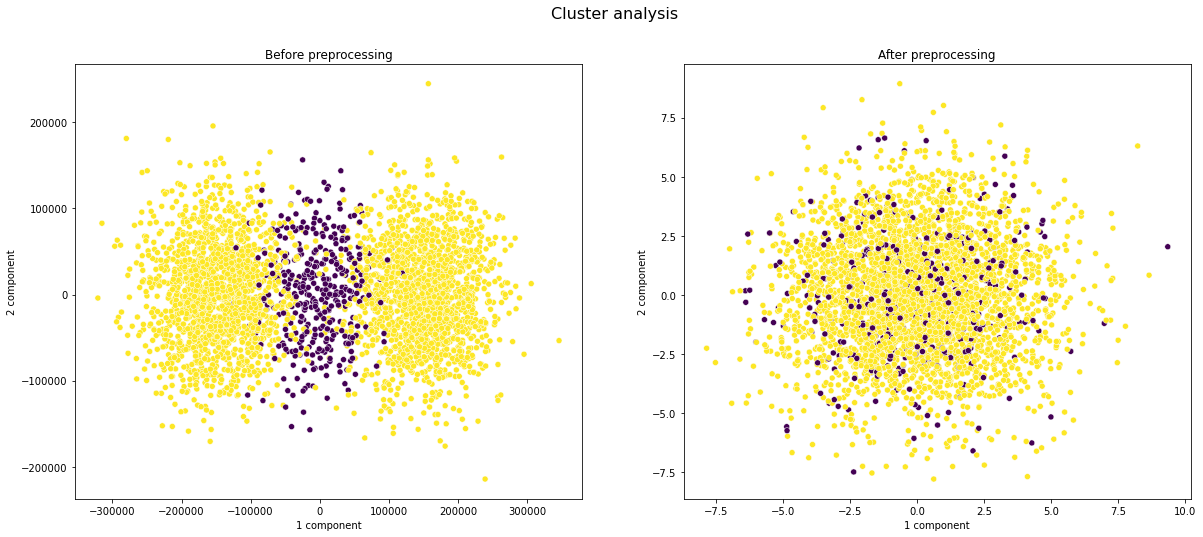

In [88]:
import plotly.express as px
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
fig.suptitle('Cluster analysis', fontsize=16)

ax2.set_title('After preprocessing')
ax2.set_xlabel('1 component')
ax2.set_ylabel('2 component')

ax2 = sns.scatterplot(x=X_prep_pca[:,0], y=X_prep_pca[:,1], c=y[0], ax=ax2)

ax1.set_title('Before preprocessing')
ax1.set_xlabel('1 component')
ax1.set_ylabel('2 component')

ax1 = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], c=y[0], ax=ax1)

fig.savefig("cluster_analysis.jpg")
fig.show()